# Clustering Gerarchico
Il Clustering Gerarchico è un metodo di clustering che affronta il problema creando una gerarchia di cluster.<br>
Esistono due tipologie di Clustering Gerarchico:
 * **Agglomerativo** e' un approccio *bottom-up*, in cui si parte creando un cluster per ogni esempio e gradualmente si uniscono due a due, fino ad ottenere un unico cluster.
 * **Divisivo** è un approccio *top-down*, in cui si parte con un cluster che contiene tutti gli esempi che viene man mano suddiviso ricorsivamente in sotto-clusters.
 
 In questo notebook utilizzeremo il Clustering Gerarchico Agglomerativo per raggruppare in cluster un dataset generato da noi.<br><br>
 Importiamo matplotlib e seaborn, impostiamo la dimensione di default dei grafici e settiamo lo stile di seaborn.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (14, 10)
sns.set_theme()

Creiamo il nostro dataset, composto da 100 esempi che possono essere suddivisi in 3 clusters.

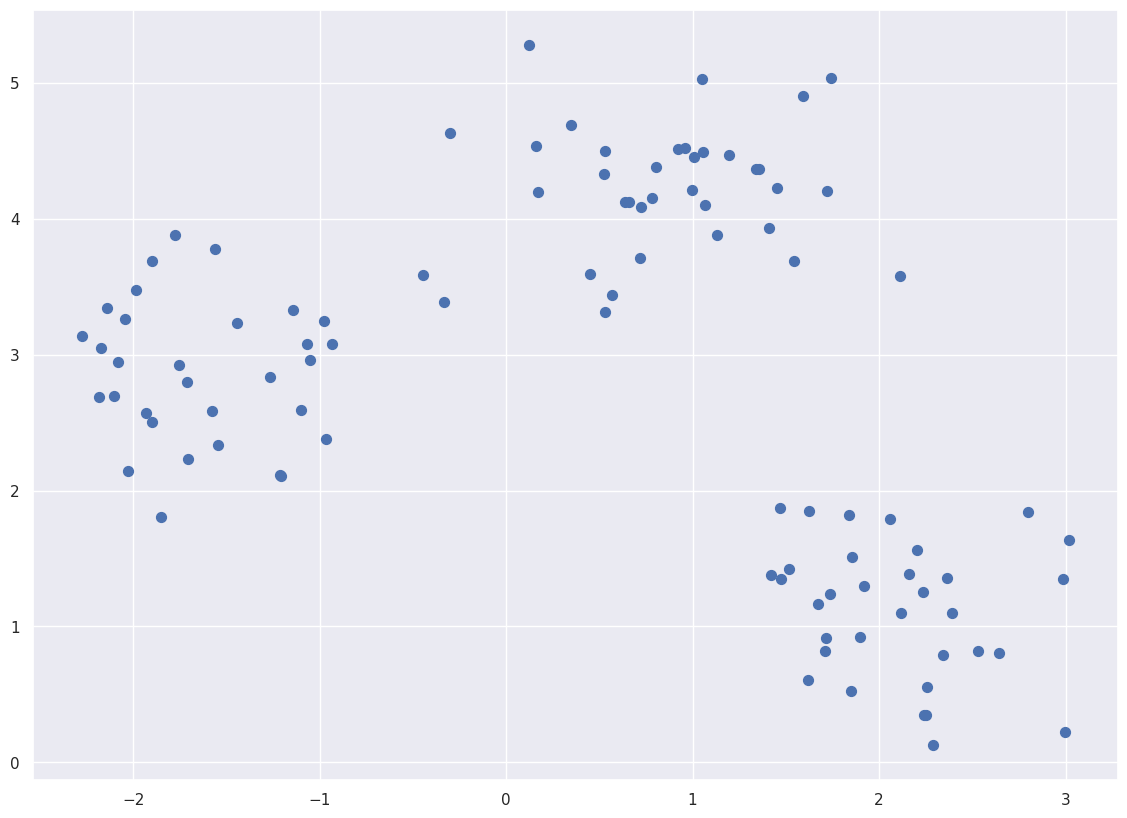

In [2]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=100, centers=3,
                       cluster_std=.5, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50);

**N.B.** 

In questo esempio i dati vengono creati ad hoc per l'esempio, in un caso reale i dati vanno sempre scalati, per il clustering gerarchico è meglio utilizzare il min max scaler per ottenere una normalizzazione delle distanze.

In [28]:
X

array([[ 2.34356293,  0.79351428],
       [ 0.5285368 ,  4.49723858],
       [ 2.52889351,  0.82015861],
       [ 0.16932115,  4.19741719],
       [ 0.4519936 ,  3.59377836],
       [ 0.802314  ,  4.38196181],
       [-2.10063834,  2.69897224],
       [-1.05219361,  2.96165788],
       [ 2.3914149 ,  1.10139458],
       [ 0.65910903,  4.12241674],
       [ 1.34081536,  4.36827878],
       [ 1.59141542,  4.90497725],
       [ 2.28809874,  0.12954182],
       [ 1.74265969,  5.03846671],
       [-1.89928142,  2.50466299],
       [ 2.989047  ,  1.35068599],
       [-1.57613028,  2.58614312],
       [ 0.56969694,  3.44064603],
       [-1.56102482,  3.77455362],
       [-2.07909568,  2.9439648 ],
       [-1.84871321,  1.80618069],
       [-1.54654542,  2.33383551],
       [-1.20683825,  2.10940424],
       [ 0.5323772 ,  3.31338909],
       [ 1.51989121,  1.42488952],
       [ 2.11872357,  1.09865834],
       [ 1.67030948,  1.16728826],
       [ 1.4726926 ,  1.3480769 ],
       [-1.71149493,

In [27]:
# scaler
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
scaled_df = scale.fit_transform(X)
scaled_df


array([[0.8727281 , 0.12893588],
       [0.52957571, 0.84815687],
       [0.90776706, 0.1341099 ],
       [0.46166169, 0.78993497],
       [0.5151043 , 0.6727152 ],
       [0.58133656, 0.82577143],
       [0.03249871, 0.49895406],
       [0.23071972, 0.54996462],
       [0.88177509, 0.18872272],
       [0.55426195, 0.77537074],
       [0.68314668, 0.82311435],
       [0.73052562, 0.92733506],
       [0.86224193, 0.        ],
       [0.75912016, 0.95325719],
       [0.07056764, 0.46122143],
       [0.99476458, 0.23713226],
       [0.13166323, 0.47704394],
       [0.53735752, 0.64297865],
       [0.13451909, 0.70781969],
       [0.0365716 , 0.54652882],
       [0.08012816, 0.32558413],
       [0.1372566 , 0.42804868],
       [0.2014823 , 0.38446669],
       [0.53030178, 0.61826681],
       [0.71700311, 0.25154174],
       [0.83021953, 0.18819137],
       [0.74544149, 0.20151852],
       [0.70807965, 0.23662561],
       [0.10607092, 0.51822154],
       [0.21392816, 0.62142145],
       [0.

### Distanza massima 
Scalare con il min max permette di fare delle valutazioni sulla distanza.

La massima distanza teorica tra 2 punti è data dalla radice quadrata del numero di colonne che abbiamo nel dataframe (per estensione del calcolo della distanza nel piano). Quindi un buon punto di partenza potrebbe essere un numero simile alla distanza massima.


## Creare un dendrogramma con scipy
Possiamo utilizzare scipy per eseguire il clustering gerarchico agglomerativo di un dataset, in questo modo otterremo un **dendrogramma** che conterrà tutti i possibili cluster.
<br><br>
Per farlo utilizziamo le seguenti funzioni:
* **<span style="font-family: Monaco">linkage</span>**: per eseguire il clustering gerarchico
* **<span style="font-family: Monaco">dendrogram</span>**: per costruire il dendrogramma

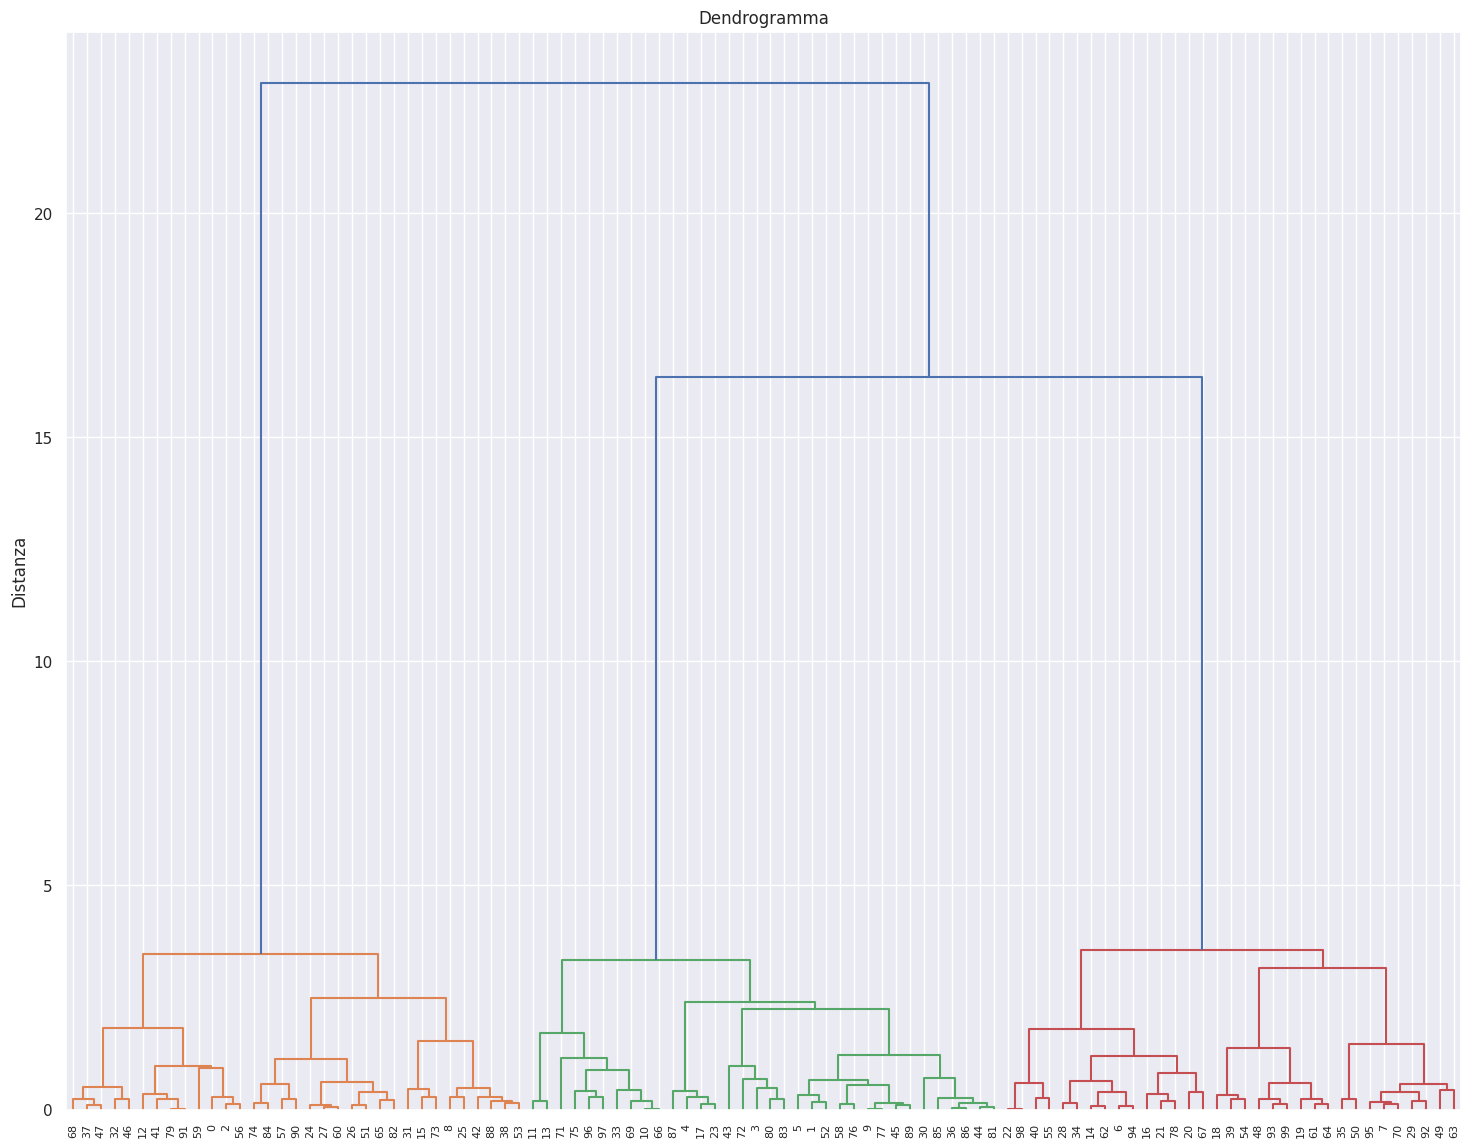

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(18,14))
dendogram = dendrogram(linkage(X, method="ward"))
# dendogram = dendrogram(linkage(X, method="ward"), truncate_mode='lastp', p=40)
# dendogram = dendrogram(linkage(X, method="ward"), truncate_mode='level', p=3)
plt.ylabel("Distanza")
plt.title("Dendrogramma")
plt.xticks(fontsize=8)
# plt.ylim(0,5)
plt.show()

Ecco il nostro dendrogramma.
<br><br>
Possiamo osservare che i clusters rappresentati dalle linee blu sono stati formati dall'unione di clusters che hanno una distanza notevolmente maggiore rispetto a quelli sottostanti, quindi se volessimo tagliare il dendrogramma possiamo posizionare la nostra soglia intorno a 5.<br>


Contando il numero di linee che la soglia attraversa otteniamo il numero di cluster, che è pari a 3.

## Clustering Gerarchico Agglomerativo con scikit-learn
Possiamo eseguire il Clustering Gerarchico Agglomerativo anche utilizziando scikit-learn, ma in questo caso dobbiamo specificare il numero di cluster come parametro del modello, quindi a priori.
<br><br>
Dalla precedente analisi del dendrogramma abbiamo determinato che il numero di clusters ottimale è 3, quindi possiamo passare a costruire il modello, per farlo utilizziamo la classe <span style="font-family: Monaco">AgglomerativeClustering</span> di scikit-learn a cui dobbiamo passare il numero di clusters da cercare all'interno del parametro <span style="font-family: Monaco">n_clusters</span>.

In [11]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3)
y = hc.fit_predict(X)

**N.B.** qui al posto di n_cluster posso indicare la distanza con il parametro `distance_threshold= #distanza`

Stampiamo il risultato del clustering su di uno scatter plot.

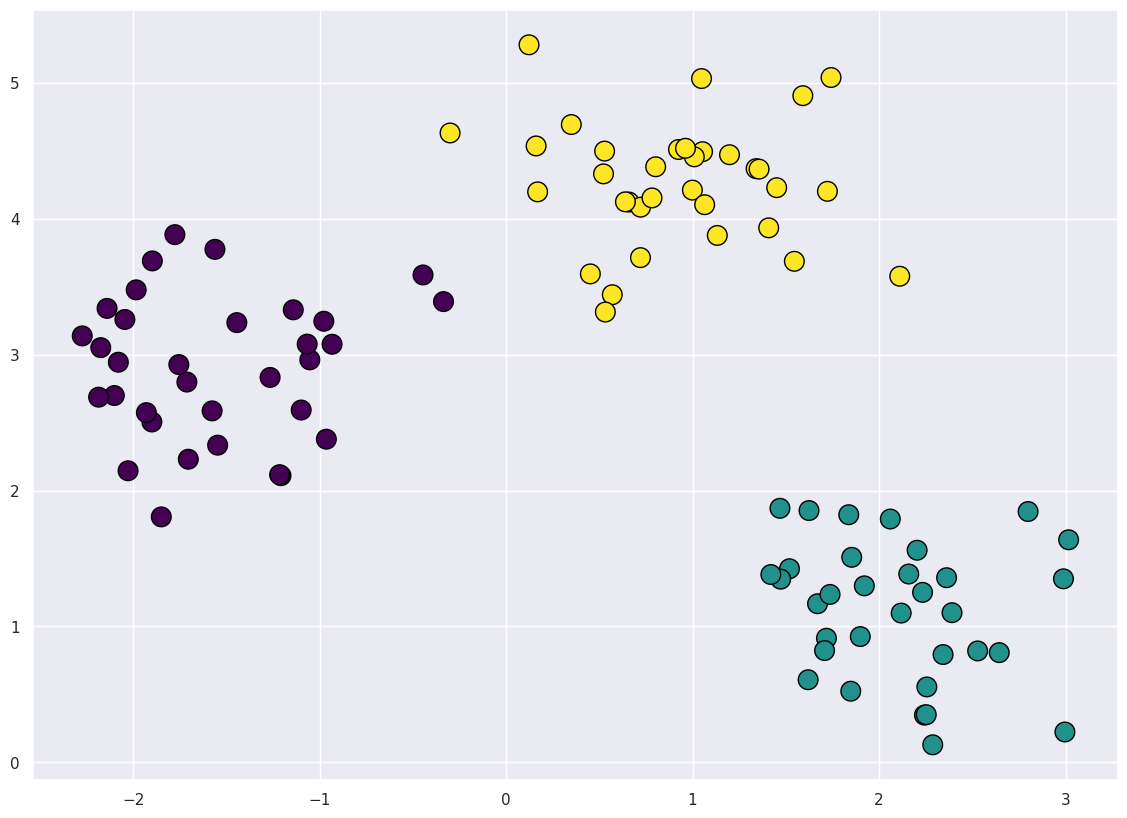

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=200, cmap='viridis', edgecolors="black");